In [2]:
import pandas as pd
import seaborn as sns
from glob import glob

In [15]:
result_files = glob('../results/*.csv')
results = pd.DataFrame()

for filepath in result_files:
    data = pd.read_csv(filepath, header=0, index_col=None)
    results = pd.concat([results, data])
    
indexes = results['evaluator'].apply(lambda x: x != 'inverse_square')
results = results.loc[indexes, :]
results

,dataset,cv,k_label,k,dist,evaluator,n_folds,fold,accuracy,precision,recall,f1
0,car_evaluation,0,5,5,euclidean,majority,10,0,0.994220,1.000000,0.982456,0.991150
1,car_evaluation,0,5,5,euclidean,majority,10,1,1.000000,1.000000,1.000000,1.000000
2,car_evaluation,0,5,5,euclidean,majority,10,2,1.000000,1.000000,1.000000,1.000000
3,car_evaluation,0,5,5,euclidean,majority,10,3,1.000000,1.000000,1.000000,1.000000
4,car_evaluation,0,5,5,euclidean,majority,10,4,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
245,wine_quality_white,4,n,3564,euclidean,averaged_inverse_square,10,5,0.368687,0.368687,0.368687,0.368687
246,wine_quality_white,4,n,3564,euclidean,averaged_inverse_square,10,6,0.358586,0.358586,0.358586,0.358586
247,wine_quality_white,4,n,3564,euclidean,averaged_inverse_square,10,7,0.351010,0.351010,0.351010,0.351010
248,wine_quality_white,4,n,3564,euclidean,averaged_inverse_square,10,8,0.333333,0.333333,0.333333,0.333333


In [16]:
mean_results = results.groupby(['dataset', 'k_label', 'dist', 'evaluator']).mean()
std_results = results.groupby(['dataset', 'k_label', 'dist', 'evaluator']).std()
std_results = std_results.drop(['cv', 'k', 'n_folds', 'fold'], axis=1)
std_results.columns = ['accuracy_std', 'precision_std', 'recall_std', 'f1_std']

summary = pd.concat([mean_results, std_results], axis=1)
summary

cv       k  \
dataset            k_label dist      evaluator                              
breast_cancer      5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0   217.0   
                                     majority                 2.0   217.0   
                   sqrt(n) euclidean majority                 2.0    14.0   
car_evaluation     5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0  1555.0   
                                     majority                 2.0  1555.0   
                   sqrt(n) euclidean majority                 2.0    39.0   
dis                5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0  3339.0   
                                     majority                 2.0  3339.0   
                   sqrt(n) euclidean majority                 2.0    57.0   
iris               5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0   117.0   
                                     majority                 2.0   117.0   
                   sqrt(n) euclidean majority                 2.0    10.0   
lupus              5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0    69.0   
                                     majority                 2.0    69.0   
                   sqrt(n) euclidean majority                 2.0     8.0   
spambase           5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0  3789.0   
                                     majority                 2.0  3789.0   
                   sqrt(n) euclidean majority                 2.0    61.0   
wine_quality_white 5       euclidean majority                 2.0     5.0   
                   n       euclidean averaged_inverse_square  2.0  3564.0   
                                     majority                 2.0  3564.0   
                   sqrt(n) euclidean majority                 2.0    59.0   

                                                              n_folds  fold  \
dataset            k_label dist      evaluator                                
breast_cancer      5       euclidean majority                     5.0   2.0   
                   n       euclidean averaged_inverse_square      5.0   2.0   
                                     majority                     5.0   2.0   
                   sqrt(n) euclidean majority                     5.0   2.0   
car_evaluation     5       euclidean majority                    10.0   4.5   
                   n       euclidean averaged_inverse_square     10.0   4.5   
                                     majority                    10.0   4.5   
                   sqrt(n) euclidean majority                    10.0   4.5   
dis                5       euclidean majority                    10.0   4.5   
                   n       euclidean averaged_inverse_square     10.0   4.5   
                                     majority                    10.0   4.5   
                   sqrt(n) euclidean majority                    10.0   4.5   
iris               5       euclidean majority                     5.0   2.0   
                   n       euclidean averaged_inverse_square      5.0   2.0   
                                     majority                     5.0   2.0   
                   sqrt(n) euclidean majority                     5.0   2.0   
lupus              5       euclidean majority                     5.0   2.0   
                   n       euclidean averaged_inverse_square      5.0   2.0   
                                     majority                     5.0   2.0   
                   sqrt(n) euclidean majority                     5.0   2.0   
spambase      

In [17]:
indexes = summary.groupby('dataset').idxmax()['f1']
best_f1 = summary.loc[indexes, :]
best_f1

,,,,cv,k,n_folds,fold,accuracy,precision,recall,f1,accuracy_std,precision_std,recall_std,f1_std
dataset,k_label,dist,evaluator,,,,,,,,,,,,
breast_cancer,n,euclidean,averaged_inverse_square,2.0,217.0,5.0,2.0,0.665387,0.433950,0.420588,0.426197,0.038843,0.065873,0.087762,0.075190
car_evaluation,5,euclidean,majority,2.0,5.0,10.0,4.5,0.999422,1.000000,0.998246,0.999115,0.001752,0.000000,0.005317,0.002682
dis,n,euclidean,majority,2.0,3339.0,10.0,4.5,0.984371,0.984371,1.000000,0.992124,0.001087,0.001087,0.000000,0.000552
iris,sqrt(n),euclidean,majority,2.0,10.0,5.0,2.0,0.979540,0.979540,0.979540,0.979540,0.017055,0.017055,0.017055,0.017055
lupus,sqrt(n),euclidean,majority,2.0,8.0,5.0,2.0,0.771242,0.750476,0.628571,0.670476,0.069836,0.069931,0.197777,0.152654
spambase,5,euclidean,majority,2.0,5.0,10.0,4.5,0.898575,0.890999,0.849947,0.869546,0.012789,0.011981,0.035357,0.018590
wine_quality_white,sqrt(n),euclidean,majority,2.0,59.0,10.0,4.5,0.531932,0.531932,0.531932,0.531932,0.023798,0.023798,0.023798,0.023798


In [18]:
indexes = summary.loc[pd.IndexSlice[:,'n',:,:], :].groupby('dataset').idxmax()['f1']
best_f1_with_n = summary.loc[indexes, :]
best_f1_with_n

,,,,cv,k,n_folds,fold,accuracy,precision,recall,f1,accuracy_std,precision_std,recall_std,f1_std
dataset,k_label,dist,evaluator,,,,,,,,,,,,
breast_cancer,n,euclidean,averaged_inverse_square,2.0,217.0,5.0,2.0,0.665387,0.433950,0.420588,0.426197,0.038843,0.065873,0.087762,0.075190
car_evaluation,n,euclidean,averaged_inverse_square,2.0,1555.0,10.0,4.5,0.902178,0.774557,1.000000,0.872511,0.019045,0.035928,0.000000,0.022518
dis,n,euclidean,majority,2.0,3339.0,10.0,4.5,0.984371,0.984371,1.000000,0.992124,0.001087,0.001087,0.000000,0.000552
iris,n,euclidean,averaged_inverse_square,2.0,117.0,5.0,2.0,0.952184,0.952184,0.952184,0.952184,0.036079,0.036079,0.036079,0.036079
lupus,n,euclidean,averaged_inverse_square,2.0,69.0,5.0,2.0,0.690850,0.623175,0.600000,0.606593,0.125111,0.151861,0.170034,0.156882
spambase,n,euclidean,averaged_inverse_square,2.0,3789.0,10.0,4.5,0.867696,0.837809,0.829103,0.832779,0.016381,0.016134,0.044827,0.023999
wine_quality_white,n,euclidean,majority,2.0,3564.0,10.0,4.5,0.451401,0.451401,0.451401,0.451401,0.001021,0.001021,0.001021,0.001021


In [19]:
indexes = summary.loc[pd.IndexSlice[:,:,:,'averaged_inverse_square'], :].groupby('dataset').idxmax()['f1']
best_f1_with_is = summary.loc[indexes, :]
best_f1_with_is

,,,,cv,k,n_folds,fold,accuracy,precision,recall,f1,accuracy_std,precision_std,recall_std,f1_std
dataset,k_label,dist,evaluator,,,,,,,,,,,,
breast_cancer,n,euclidean,averaged_inverse_square,2.0,217.0,5.0,2.0,0.665387,0.433950,0.420588,0.426197,0.038843,0.065873,0.087762,0.075190
car_evaluation,n,euclidean,averaged_inverse_square,2.0,1555.0,10.0,4.5,0.902178,0.774557,1.000000,0.872511,0.019045,0.035928,0.000000,0.022518
dis,n,euclidean,averaged_inverse_square,2.0,3339.0,10.0,4.5,0.553763,0.997959,0.547766,0.706925,0.027467,0.002525,0.027436,0.022892
iris,n,euclidean,averaged_inverse_square,2.0,117.0,5.0,2.0,0.952184,0.952184,0.952184,0.952184,0.036079,0.036079,0.036079,0.036079
lupus,n,euclidean,averaged_inverse_square,2.0,69.0,5.0,2.0,0.690850,0.623175,0.600000,0.606593,0.125111,0.151861,0.170034,0.156882
spambase,n,euclidean,averaged_inverse_square,2.0,3789.0,10.0,4.5,0.867696,0.837809,0.829103,0.832779,0.016381,0.016134,0.044827,0.023999
wine_quality_white,n,euclidean,averaged_inverse_square,2.0,3564.0,10.0,4.5,0.365050,0.365050,0.365050,0.365050,0.021436,0.021436,0.021436,0.021436


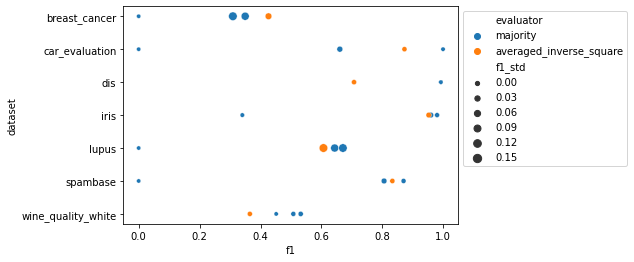

In [20]:
data = summary.reset_index()
ax = sns.scatterplot(data=data, x='f1', y='dataset', size='f1_std', hue='evaluator')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

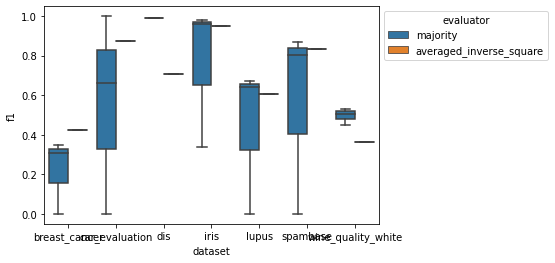

In [21]:
data = summary.reset_index()
ax = sns.boxplot(data=data, x='dataset', y='f1', hue='evaluator')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

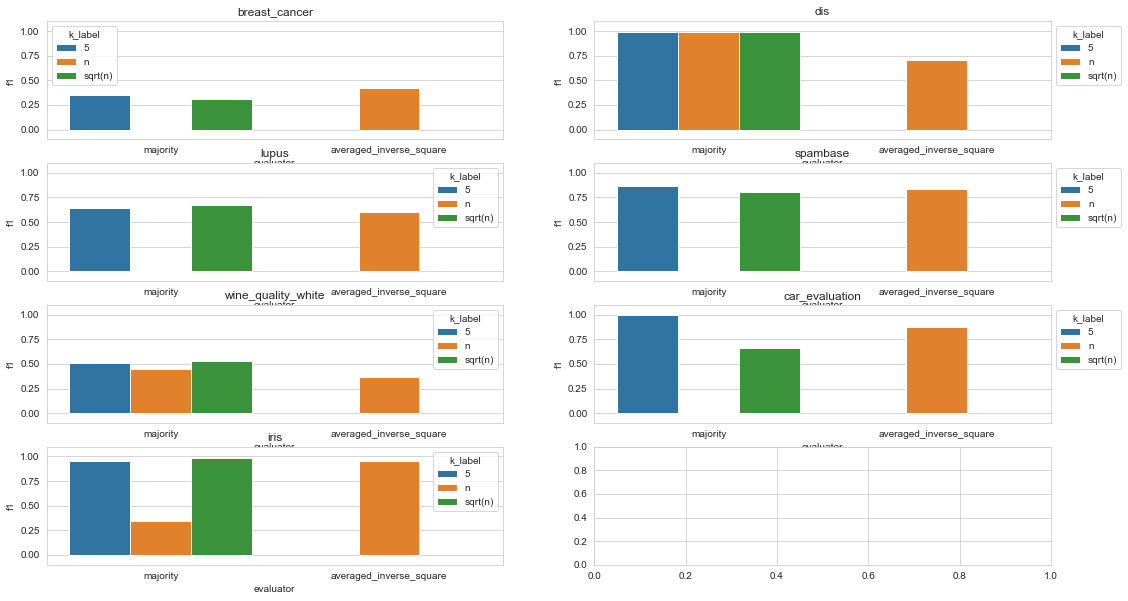

In [28]:
import matplotlib.pyplot as plt

data = summary.reset_index()
sns.set_style("whitegrid")

fig, axes = plt.subplots(4, 2, figsize=(18, 10))
# fig.suptitle('Pokemon Stats by Generation')

k = 0
datasets = list(set(data['dataset']))

for i in range(4):
    for j in range(2):
        if k < len(datasets):
            dt = datasets[k]
            indexes = data['dataset'].apply(lambda d: d == dt)
            
            axes[i, j].set_title(dt)
            g = sns.barplot(ax=axes[i, j], data=data.loc[indexes, :], x='evaluator', y='f1', hue='k_label')
            axes[i, j].set(ylim=(-0.1, 1.1))
            
            if j == 1:
                sns.move_legend(axes[i, j], "upper left", bbox_to_anchor=(1, 1))
            else:
                plt.legend([],[], frameon=False)
                
            k += 1
